# Is the flat loss regime that bad?

In [6]:
import jax.numpy as np
from jax import grad, jit, vmap, random, jacfwd, jacrev
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

from svgd import SVGD
from metrics import ksd
import time
import plot

rkey = random.PRNGKey(0)

n=100
d=1
stepsize = 0.01
svgd_stepsize = stepsize
n_iter_max = 500 # 100 slightly to little, this should be all right
# grid_length = 25
# bandwidth = 1

from jax.scipy.stats import norm

@jit
def logp(x):
    assert x.ndim == 1
    return np.sum(norm.logpdf(x, loc=0, scale=1)) 

from svgd import get_bandwidth

svgd_fix = SVGD(logp=logp, n_iter_max=n_iter_max, adaptive_kernel=False, get_bandwidth=None, particle_shape=(n, d))
svgd_ada = SVGD(logp=logp, n_iter_max=n_iter_max, adaptive_kernel=True,  get_bandwidth=get_bandwidth, particle_shape=(n, d))

cpu


## What happens if we end up in the flat region?
Say, $h = 25$.

In [9]:
n_iter = n_iter_max
bandwidth = 25
svgd_fix.newkey()
xout, log = svgd_fix.svgd(svgd_fix.rkey, stepsize, bandwidth, n_iter)

log["ksd 1.0"][-1]

JIT COMPILING svgd...
...done compiling svgd after 0.16350746154785156 seconds.


DeviceArray([0.4350551], dtype=float32)

6 3


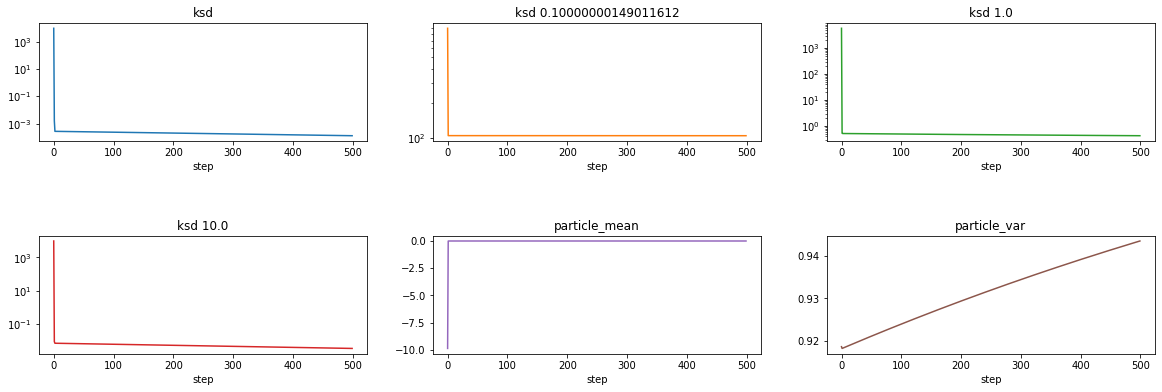

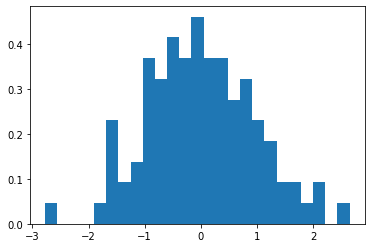

In [21]:
plot.svgd_log(log, xout)

Doesn't look bad. Compare:

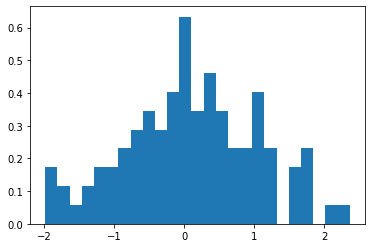

In [28]:
xtest = random.normal(rkey, shape=(n,))
_ = plt.hist(xtest, bins=25, density=True)